In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import os

folder_path = '/content/drive/My Drive/capstone_data/NMME'

files = os.listdir(folder_path)

for file in files:
    print("NMME Files:")
    print(file)

NMME Files:
prec.CanESM5.1991.mon_Apr.nc


In [37]:
folder_path = '/content/drive/My Drive/capstone_data/CDS'

files = os.listdir(folder_path)

for file in files:
    print("CDS Files:")
    print(file)

CDS Files:
prec.ECMWF.2024.mon_Dec.nc


In [38]:
# xarray to read NETCDF
import xarray as xr

# Load the dataset (NMME)
file_path = '/content/drive/My Drive/capstone_data/NMME/prec.CanESM5.1991.mon_Apr.nc'
ds = xr.open_dataset(file_path)

# View dataset info
print(ds)

<xarray.Dataset> Size: 63MB
Dimensions:  (Y: 181, L: 12, X: 360, M: 20, S: 1)
Coordinates:
  * Y        (Y) float32 724B -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0 90.0
  * L        (L) float32 48B 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5
  * X        (X) float32 1kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * M        (M) float32 80B 1.0 2.0 3.0 4.0 5.0 ... 16.0 17.0 18.0 19.0 20.0
  * S        (S) datetime64[ns] 8B 1991-04-01
Data variables:
    prec     (S, L, M, Y, X) float32 63MB ...


In [10]:
# View NMME data as data frame
# Select a specific slice of data
precip_slice = ds['prec']

# Convert to a pandas DataFrame (flatten the 2D array to 1D)
precip_df = precip_slice.to_dataframe().reset_index()

# View the first few rows of the DataFrame
print(precip_df)
print(precip_df.columns)

                  S     L     M     Y      X      prec
0        1991-04-01   0.5   1.0 -90.0    0.0  0.514423
1        1991-04-01   0.5   1.0 -90.0    1.0  0.514423
2        1991-04-01   0.5   1.0 -90.0    2.0  0.514423
3        1991-04-01   0.5   1.0 -90.0    3.0  0.514423
4        1991-04-01   0.5   1.0 -90.0    4.0  0.514423
...             ...   ...   ...   ...    ...       ...
15638395 1991-04-01  11.5  20.0  90.0  355.0  0.437545
15638396 1991-04-01  11.5  20.0  90.0  356.0  0.437545
15638397 1991-04-01  11.5  20.0  90.0  357.0  0.437545
15638398 1991-04-01  11.5  20.0  90.0  358.0  0.437545
15638399 1991-04-01  11.5  20.0  90.0  359.0  0.437545

[15638400 rows x 6 columns]
Index(['S', 'L', 'M', 'Y', 'X', 'prec'], dtype='object')


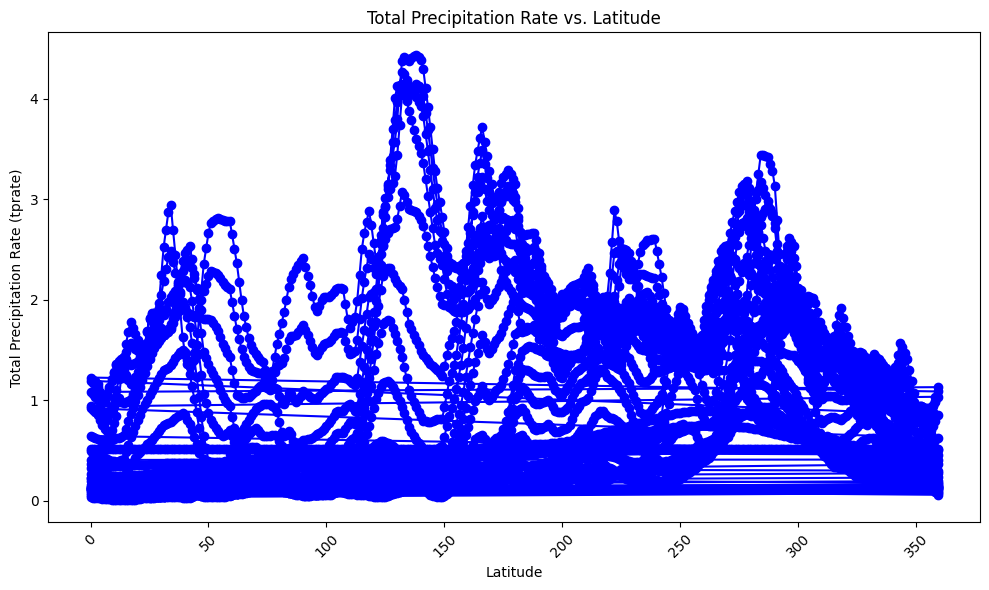

In [ ]:
import matplotlib.pyplot as plt

# Subset the first 10000 points
test = precip_df[0:10000]

# Plot precipitation against forecast_reference_time
plt.figure(figsize=(10, 6))
plt.plot(test['X'], test['prec'], marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Total Precipitation Rate (prec)')
plt.title('Total Precipitation Rate vs. Latitude')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [91]:
# Open CDS dataset (unmodified)
file_path = '/content/drive/My Drive/capstone_data/CDS/prec.ECMWF.2024.mon_Dec.nc'

## Load the dataset (CDS)
ds_cds_og = xr.open_dataset(file_path)

# View dataset info
print(ds_cds_og)

<xarray.Dataset> Size: 79MB
Dimensions:                  (number: 51, forecast_reference_time: 1,
                              forecastMonth: 6, latitude: 180, longitude: 360)
Coordinates:
  * number                   (number) int64 408B 0 1 2 3 4 5 ... 46 47 48 49 50
  * forecast_reference_time  (forecast_reference_time) datetime64[ns] 8B 2024...
  * forecastMonth            (forecastMonth) int64 48B 1 2 3 4 5 6
  * latitude                 (latitude) float64 1kB 89.5 88.5 ... -88.5 -89.5
  * longitude                (longitude) float64 3kB 0.5 1.5 2.5 ... 358.5 359.5
Data variables:
    tprate                   (forecastMonth, forecast_reference_time, number, latitude, longitude) float32 79MB ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weath

In [92]:
# View original CDS as dataframe
precip_slice = ds_cds_og['tprate']

# Convert to a pandas DataFrame (flatten the 2D array to 1D)
precip_df = precip_slice.to_dataframe().reset_index()

# View the first few rows of the DataFrame
print(precip_df)
print(precip_df.columns)

          forecastMonth forecast_reference_time  number  latitude  longitude  \
0                     1              2024-12-01       0      89.5        0.5   
1                     1              2024-12-01       0      89.5        1.5   
2                     1              2024-12-01       0      89.5        2.5   
3                     1              2024-12-01       0      89.5        3.5   
4                     1              2024-12-01       0      89.5        4.5   
...                 ...                     ...     ...       ...        ...   
19828795              6              2024-12-01      50     -89.5      355.5   
19828796              6              2024-12-01      50     -89.5      356.5   
19828797              6              2024-12-01      50     -89.5      357.5   
19828798              6              2024-12-01      50     -89.5      358.5   
19828799              6              2024-12-01      50     -89.5      359.5   

                tprate  
0         6.65

In [133]:
# a loop that does stuff to all CDS files and saves them separately

"""
TODO
Spatial extent problem (interpolation? regridding? nearest neighbor?)

The current method (nearest neighbor) increases datapoints in the CDS dataset by about 11000
for the given example, but the tolerance is adjustable (If the absolute difference between a source coordinate and a
target coordinate is less than or equal to the tolerance value,
they are considered a match). Since we know that each coordinate is off by 0.5, what can we do with this info?
"""

import pandas as pd
import xarray as xr
import os

# CDS folder path to modify
CDS_folder_path = '/content/drive/My Drive/capstone_data/CDS'

# NMME file as a spatial reference
NMME_file_path = '/content/drive/My Drive/capstone_data/NMME/prec.CanESM5.1991.mon_Apr.nc'

# Path to save modifed CDS files
save_path = '/content/drive/My Drive/capstone_data/CDS_converted'

def convert_CDS_to_NMME(CDS_folder_path, NMME_file_path, save_path):
  """ This function takes a folder path containing CDS NETCDF files, and
      converts them so that it follows a similar variable naming convention
      and spatial extent as a reference NMME dataset. Each modified file is
      stored to a defined save path with an extension of "_modified.nc"

      Arguments: CDS_folder_path - a folder path to CDS data to be modified
                 NMME_file_path - a file path to NMME data for spatial reference
                 save_path - a folder path to save the modified CDS files

      Function Outline:
      1. Open NMME reference file, store for spatial reference
      2. Loop through all files in CDS folder
          a. Open the current CDS NETCDF file and change all variable names to match
         NMME data (manually named, e.g. "longitude" renamed to "X")
          b. Convert tprate from m/sec to mm/day with rate of 86400000
          c. Use nearest neighbors to estimate and reindex CDS data to NMME grid.
             The tolerance parameter for this method can be experiemnted with.
             (If the absolute difference between a source coordinate and a
             target coordinate is less than or equal to the tolerance value,
             they are considered a match.)
          d. Save file to save_path folder with extension "_modified.nc"

      Assumptions and Usage Guidelines:
      1. Python and Package Versions:
         a. Python - 3.10
         b. pandas - 2.2.3
         c. xarray - 2025.1.1
      2. Ensure that the intended file paths follow this format:
         a. CDS folder path: "C:/Users/name/OneDrive/Documents/CDS_folder"
         b. NMME file path: "C:/Users/name/OneDrive/Documents/NMME_folder/NMME_data1.nc"
         c. Save path: "C:/Users/name/OneDrive/Documents/save_folder"
         d. Do not have any slashes at the end of the paths
         e. You can name the folders anything you desire and at any location.
  """

  # Load a reference NMME file to get spatial extent
  nmme_ds = xr.open_dataset(NMME_file_path)

  file_names = os.listdir(CDS_folder_path)

  for file in file_names:

    print(f'Currently Modifying: {file}')

    # Load the dataset (CDS)
    current_file = f'{CDS_folder_path}/{file}'

    # Assign current dataset
    current_ds = xr.open_dataset(current_file)

    # rename tprate to prec to match NMME data, and convert m/sec to mm/day.
    current_ds['prec'] = current_ds['tprate'] * 86400000

    # Rename longitude to X
    current_ds = current_ds.rename({'longitude': 'X'})

    # Rename latitude to Y
    current_ds = current_ds.rename({'latitude': 'Y'})

    # Rename forecast_month to L (do we need to subtract by 0.5?)
    current_ds = current_ds.rename({'forecastMonth': 'L'})

    # Rename number to M
    current_ds = current_ds.rename({'number': 'M'})

    # Rename forecast_reference_time to S
    current_ds = current_ds.rename({'forecast_reference_time': 'S'})

    # drops the original tprate variable
    current_ds = current_ds.drop_vars('tprate')

    # Reindex to NMME grid using nearest-neighbor
    # Adjust tolerance if needed
    current_ds = current_ds.reindex(
            Y=nmme_ds['Y'],
            X=nmme_ds['X'],
            method='nearest',
            tolerance=1
        )

    # saves the file to the CDS_converted folder, with the same name + _modified
    current_ds.to_netcdf(f'{save_path}/{file[0:-3]}_modified.nc')

    print(f'Successfully Modified: {file}')
    print(f"Saved in: {save_path}/{file[0:-3]}_modified.nc")

convert_CDS_to_NMME(CDS_folder_path, NMME_file_path, save_path)

Currently Modifying: prec.ECMWF.2024.mon_Dec.nc
Successfully Modified: prec.ECMWF.2024.mon_Dec.nc
Saved in: /content/drive/My Drive/capstone_data/CDS_converted/prec.ECMWF.2024.mon_Dec_modified.nc


In [134]:
# Open modified CDS data sample
file_path = '/content/drive/My Drive/capstone_data/CDS_converted/prec.ECMWF.2024.mon_Dec_modified.nc'

## Load the dataset (CDS)
ds_cds = xr.open_dataset(file_path)

# View dataset info
print(ds_cds)

<xarray.Dataset> Size: 160MB
Dimensions:  (X: 360, Y: 181, M: 51, L: 6, S: 1)
Coordinates:
  * X        (X) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * Y        (Y) float64 1kB -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0 90.0
  * M        (M) int32 204B 0 1 2 3 4 5 6 7 8 9 ... 42 43 44 45 46 47 48 49 50
  * L        (L) int32 24B 1 2 3 4 5 6
  * S        (S) datetime64[ns] 8B 2024-12-01
Data variables:
    prec     (L, S, M, Y, X) float64 160MB ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-01-10T22:44 GRIB to CDM+CF via cfgrib-0.9.1...


In [135]:
# View modified CDS as dataframe
precip_slice = ds_cds['prec']

# Convert to a pandas DataFrame (flatten the 2D array to 1D)
precip_df = precip_slice.to_dataframe().reset_index()

# View the first few rows of the DataFrame
print(precip_df)
print(precip_df.columns)

          L          S   M     Y      X      prec
0         1 2024-12-01   0 -90.0    0.0  0.039604
1         1 2024-12-01   0 -90.0    1.0  0.039604
2         1 2024-12-01   0 -90.0    2.0  0.039604
3         1 2024-12-01   0 -90.0    3.0  0.038976
4         1 2024-12-01   0 -90.0    4.0  0.038976
...      ..        ...  ..   ...    ...       ...
19938955  6 2024-12-01  50  90.0  355.0  0.516116
19938956  6 2024-12-01  50  90.0  356.0  0.518002
19938957  6 2024-12-01  50  90.0  357.0  0.519888
19938958  6 2024-12-01  50  90.0  358.0  0.521773
19938959  6 2024-12-01  50  90.0  359.0  0.523659

[19938960 rows x 6 columns]
Index(['L', 'S', 'M', 'Y', 'X', 'prec'], dtype='object')


In [136]:
# View a datapoint to see if prec has been estimated well by nearest neighbors

# Convert 'tprate' from m/s to mm/day and extract as a slice
precip_slice_og = ds_cds_og['tprate'] * 86400000

# Convert the xarray DataArray to a pandas DataFrame
precip_df_og = precip_slice_og.to_dataframe().reset_index()

# Select rows where latitude is 89.5 and longitude is 359
selected_data = precip_df_og[(precip_df_og['latitude'] == 89.5) & (precip_df_og['longitude'] == 358.5) & (precip_df_og['forecastMonth'] == 6) & (precip_df_og['number'] == 50)]

# View the selected rows
print("OG Data: tprate Scaled Sample")
print(selected_data)

# Using L(forecastMonth) = 6, X(longitude) = 358.5, Y(latitude) = 89.5, number = 50 as a reference point
# Modified data point: 0.523659
# Original data point: 0.521773

OG Data: tprate Scaled Sample
          forecastMonth forecast_reference_time  number  latitude  longitude  \
19764358              6              2024-12-01      50      89.5      358.5   

            tprate  
19764358  0.521773  


In [122]:
# Extract OG tprate (prec), scale it, and compute avg difference scores between it and modified (nearest neighbors)

og_tprate_values_scaled = ds_cds_og['tprate'].values * 86400000
modified_tprate_values = ds_cds['prec'].values

# Compute the difference between the average of each arrays

# compute the mean of og tprate values scaled
print(f'Mean of OG tprate (prec) values (Scaled): {og_tprate_values_scaled.mean()}')

# compute the modified tprate values scaled, with nearest neighbors spatial modification
print(f'Mean of modified tprate (prec) values, scaled and spatially extended: {modified_tprate_values.mean()}')

# Compute the difference
average_difference = abs(og_tprate_values_scaled.mean() - modified_tprate_values.mean())

print(f'Difference between the two groups: {average_difference}')

# it seems that the nearest neighbors works pretty well on average, with an
# average difference of 0.01

# is this correct?

Mean of OG tprate (prec) values (Scaled): 2.4208123206161214
Mean of modified tprate (prec) values, scaled and spatially extended: 2.4102437176114413
Difference between the two groups: 0.0105686030046801
